In [8]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 12

In [3]:
with open("txt_data/TotalData_Deltat_Aluminium.txt", "r", encoding="utf-8") as f:
    data = f.readlines()

time = np.array([float(line.split(",")[1]) for line in data])
data = np.array([float(line.split(",")[0]) for line in data])
print(len(data))

5625


In [21]:
B = 70
y, binedge = np.histogram(data, bins = B)
centers = 0.5*(binedge[1:] + binedge[:-1])
error = np.sqrt(y)

def f(t, N1, N2,tau1,tau2):
    return N1*np.exp(-t/tau1)+N2*np.exp(-t/tau2)

popt, pcov = curve_fit(f, centers, y, sigma = error)
xfit = np.linspace(0.1, np.max(centers)+0.5, 100)
fit = f(xfit, *popt)

#chi2 statistics
chi2 = np.sum((y-f(centers, *popt))**2/error**2)
chi2_red = chi2/(B-len(popt))
print(f'Chi^2 value = {chi2_red:0.2f}')

N_plus, N_minus, tau_plus, tau_minus = popt
N_plus_err, N_minus_err, tau_plus_err, tau_minus_err = np.sqrt(np.diag(pcov))
print(f'Tau_minus   =   {tau_minus:0.1f} +- {tau_minus_err:0.1f} microseconds')
print(f'Tau_plus    =   {tau_plus:0.1f} +- {tau_plus_err:0.1f} microseconds')

error[1]

Chi^2 value = 1.02
Tau_minus   =   0.5 +- 0.1 microseconds
Tau_plus    =   2.1 +- 0.1 microseconds


np.float64(20.71231517720798)

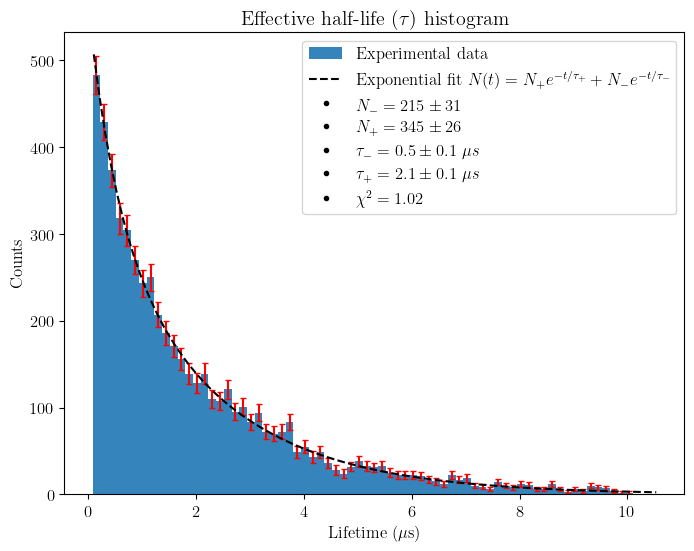

In [23]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.hist(data, bins = B, alpha=0.9, label = 'Experimental data')
ax.errorbar(centers, y, error, fmt = " ", capsize = 2, color = 'r')
ax.plot(xfit, fit,'k--', label = r'Exponential fit $N(t)=N_+ e^{-t/\tau_+}+N_- e^{-t/\tau_-}$')
ax.plot([],[],'.',color='k', label=rf'$N_- = {N_minus:.0f} \pm {N_minus_err:.0f}$')
ax.plot([],[],'.',color='k', label=rf'$N_+ = {N_plus:.0f} \pm {N_plus_err:.0f}$')
ax.plot([],[],'.',color='k', label=rf'$\tau_- = {tau_minus:.1f} \pm {tau_minus_err:.1f} \ \mu s$')
ax.plot([],[],'.',color='k', label=rf'$\tau_+ = {tau_plus:.1f} \pm {tau_plus_err:.1f} \ \mu s$')
ax.plot([],[],'.',color='k', label=rf'$\chi^2 = {chi2_red:.2f}$')
ax.set_xlabel(r"Lifetime ($\mu$s)")
ax.set_ylabel("Counts")
ax.set_title(r'Effective half-life ($\tau$) histogram')
ax.legend()

fig.savefig('../../Images/HalfLife_Histogram.pdf')